In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterSciNotation

In [2]:
path = r'..\data\20211209_viscosity_N1_raw_data.xlsx'
path_2 = r'..\data\20211115_Wierschem_low_shear_rate_measurements.xlsx'

### Combine the data from all devices
Cut the data points to show ONLY RELIABLE MEASUREMENT WINDOW

In [5]:
df_all = pd.read_excel(path, header=0, skiprows=[1])
df_mpl = pd.read_excel(path, sheet_name='MPL', header=0, skiprows=[1])
df_wierschem = pd.read_excel(path, sheet_name='Wierschem', header=0, skiprows=[1])
df_oscillatory = pd.read_excel(path, sheet_name='Oscillatory', header=0, skiprows=[1])
df_low_shear = pd.read_excel(path_2, header=0)
df_mpl = df_mpl[df_mpl['Shear Rate'] > 90]
df_wierschem = df_wierschem[df_wierschem['Shear Rate'] > 9]

df_oscillatory = df_oscillatory[df_oscillatory['Shear Rate']> 0.1]
df_oscillatory = df_oscillatory[df_oscillatory['Shear Rate']< 80]

df_05_low_shear = df_low_shear[df_low_shear['Buffer']=='0.49% MC-PBS']
df_05_low_shear = df_05_low_shear[df_05_low_shear['Shear Rate'] < 20]
df_06_low_shear = df_low_shear[df_low_shear['Buffer']=='0.59% MC-PBS']
df_06_low_shear = df_06_low_shear[df_06_low_shear['Shear Rate'] < 30]
df_084_low_shear = df_low_shear[df_low_shear['Buffer']=='0.83% MC-PBS']
df_084_low_shear = df_084_low_shear[df_084_low_shear['Shear Rate'] < 100]

df_low_shear_all = pd.concat([df_05_low_shear,df_06_low_shear,df_084_low_shear])
concatenated = pd.concat([df_mpl.assign(Device='CP'), df_wierschem.assign(Device='PP'),
                          df_low_shear_all.assign(Device='CC - rotation'), df_oscillatory.assign(Device='CC - oscillation')],
                         ignore_index=True)
concatenated

Meas. Pts.        Buffer  Shear Rate  Shear Stress  Viscosity        N1  \
0          10.0  0.49% MC-PBS       100.0        2.0173     20.173  0.004333   
1          11.0  0.49% MC-PBS       162.0        3.1633     19.545  0.011350   
2          12.0  0.49% MC-PBS       262.0        4.9063     18.727  0.029739   
3          13.0  0.49% MC-PBS       424.0        7.5270     17.749  0.077925   
4          14.0  0.49% MC-PBS       686.0       11.3680     16.560  0.204193   
..          ...           ...         ...           ...        ...       ...   
397         NaN  0.83% MC-PBS        21.5           NaN     83.516       NaN   
398         NaN  0.83% MC-PBS        29.2           NaN     76.120       NaN   
399         NaN  0.83% MC-PBS        39.6           NaN     79.872       NaN   
400         NaN  0.83% MC-PBS        53.9           NaN     76.544       NaN   
401         NaN  0.83% MC-PBS        73.3           NaN     72.982       NaN   

     Repeat            Device  
0       1.0                CP  
1       1.0                CP  
2       1.0                CP  
3       1.0                CP  
4       1.0                CP  
..      ...               ...  
397     NaN  CC - oscillation  
398     NaN  CC - oscillation  
399     NaN  CC - oscillation  
400     NaN  CC - oscillation  
401     NaN  CC - oscillation  

[402 rows x 8 columns]

In [6]:
#All data
df_05 = concatenated[concatenated['Buffer']=='0.49% MC-PBS']
df_06 = concatenated[concatenated['Buffer']=='0.59% MC-PBS']
df_084 = concatenated[concatenated['Buffer']=='0.83% MC-PBS']
df_shear = concatenated[concatenated['Device']!='CC - oscillation']

In [7]:
groupby = concatenated.groupby(by=['Device', 'Buffer', 'Shear Rate'])#, as_index=False)

df_means = groupby.mean()
df_stds = groupby.std()

# sort the rows accroding to plot order in the scatter plot
plot_order = ['CC - rotation', 'CC - oscillation', 'CP', 'PP']
df_means = df_means.loc[plot_order,:,:].reset_index()
df_stds = df_stds.loc[plot_order,:,:].reset_index()

In [8]:
concatenated_powerlaw = pd.concat([df_mpl.assign(Device='CP'), df_wierschem.assign(Device='PP')])
groupby_powerlaw = concatenated_powerlaw.groupby(by=['Device', 'Buffer', 'Shear Rate'])#, as_index=False)

df_means_powerlaw = groupby_powerlaw.mean()
df_stds_powerlaw = groupby_powerlaw.std()
df_cp_means_filt = df_means[df_means['Device']=='CP']
df_cp_means_filt

Device        Buffer  Shear Rate  Meas. Pts.  Shear Stress  Viscosity  \
144     CP  0.49% MC-PBS       100.0        10.0      2.013933  20.140667   
145     CP  0.49% MC-PBS       162.0        11.0      3.162067  19.537333   
146     CP  0.49% MC-PBS       262.0        12.0      4.906867  18.729333   
147     CP  0.49% MC-PBS       424.0        13.0      7.527967  17.751000   
148     CP  0.49% MC-PBS       686.0        14.0     11.438500  16.662000   
149     CP  0.49% MC-PBS       687.0        14.0     11.211000  16.330000   
150     CP  0.49% MC-PBS      1110.0        15.0     16.848333  15.161333   
151     CP  0.49% MC-PBS      1800.0        16.0     24.541000  13.642667   
152     CP  0.49% MC-PBS      2910.0        17.0     35.116667  12.059333   
153     CP  0.49% MC-PBS      4710.0        18.0     49.444667  10.489333   
154     CP  0.49% MC-PBS      7630.0        19.0     68.665333   8.998600   
155     CP  0.49% MC-PBS     12400.0        20.0     94.131667   7.620100   
156     CP  0.49% MC-PBS     20000.0        21.0    127.826667   6.392033   
157     CP  0.59% MC-PBS       100.0        10.0      3.245533  32.456333   
158     CP  0.59% MC-PBS       161.0        11.0      5.023067  31.234333   
159     CP  0.59% MC-PBS       259.0        12.0      7.647300  29.562667   
160     CP  0.59% MC-PBS       416.0        13.0     11.425667  27.459333   
161     CP  0.59% MC-PBS       669.0        14.0     16.823667  25.137333   
162     CP  0.59% MC-PBS      1080.0        15.0     24.219000  22.497333   
163     CP  0.59% MC-PBS      1730.0        16.0     34.240000  19.773000   
164     CP  0.59% MC-PBS      2790.0        17.0     47.589333  17.085333   
165     CP  0.59% MC-PBS      4480.0        18.0     65.178667  14.547667   
166     CP  0.59% MC-PBS      7210.0        19.0     88.012333  12.212333   
167     CP  0.59% MC-PBS     11600.0        20.0    117.436667  10.129667   
168     CP  0.59% MC-PBS     18600.0        21.0    155.650000   8.346100   
169     CP  0.83% MC-PBS       100.0        10.0      7.521700  75.221000   
170     CP  0.83% MC-PBS       158.0        11.0     11.284667  71.242667   
171     CP  0.83% MC-PBS       251.0        12.0     16.323333  65.047667   
172     CP  0.83% MC-PBS       398.0        13.0     22.931333  57.680333   
173     CP  0.83% MC-PBS       630.0        14.0     31.832667  50.542333   
174     CP  0.83% MC-PBS       998.0        15.0     43.388333  43.484000   
175     CP  0.83% MC-PBS      1580.0        16.0     58.275667  36.865333   
176     CP  0.83% MC-PBS      2500.0        17.0     77.065667  30.772333   
177     CP  0.83% MC-PBS      3970.0        18.0    100.408333  25.307667   
178     CP  0.83% MC-PBS      6290.0        19.0    128.963333  20.517000   
179     CP  0.83% MC-PBS      9960.0        20.0    164.500000  16.518000   
180     CP  0.83% MC-PBS     15800.0        21.0    208.943333  13.242000   
181     CP  0.83% MC-PBS     25000.0        22.0    264.796667  10.592667   

             N1  Repeat  
144   -5.300832     2.0  
145    0.011350     2.0  
146    0.029739     2.0  
147    0.077925     2.0  
148    0.204193     2.0  
149    0.204207     2.0  
150   11.145404     2.0  
151   33.233083     2.0  
152   46.115537     2.0  
153   94.510342     2.0  
154  152.552901     2.0  
155  241.189357     2.0  
156  348.355758     2.0  
157    0.004333     2.0  
158    5.316371     2.0  
159    0.028993     2.0  
160   15.990509     2.0  
161    5.499251     2.0  
162   21.722811     2.0  
163   49.045671     2.0  
164   77.633777     2.0  
165  130.716460     2.0  
166  202.879321     2.0  
167  307.575157     2.0  
168  447.773039     2.0  
169    0.004332     2.0  
170    0.010870     2.0  
171    5.332449     2.0  
172   21.289138     2.0  
173   32.002863     2.0  
174   58.788190     2.0  
175   80.660182     2.0  
176  135.346719     2.0  
177  203.111924     2.0  
178  298.293271     2.0  
179  414.334229     2.0  
180  595.945176     2.0  
181  838.413

### Figure 2A Cox-Merz relationship - Viscosity/Complex viscosity of combined devices

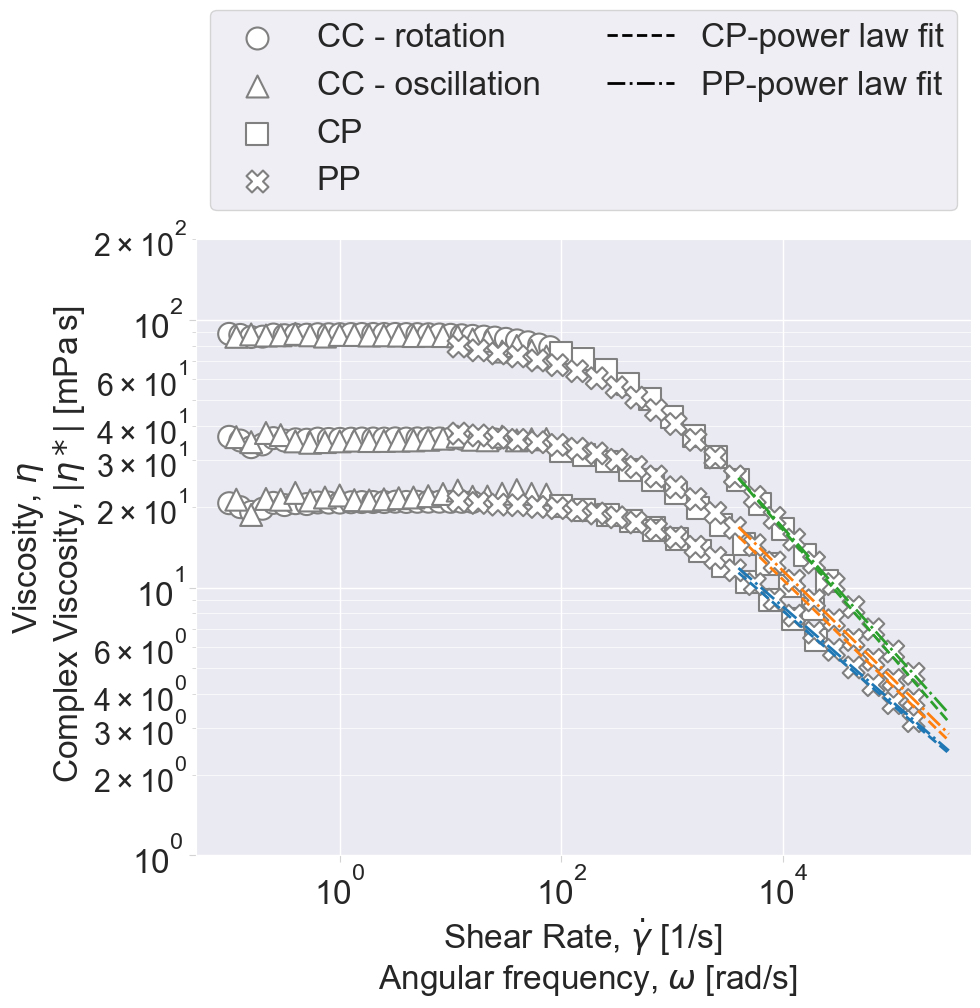

In [9]:
x_axis='Shear Rate'
y_axis='Viscosity'
plot_order = ['CC - rotation', 'CC - oscillation', 'CP', 'PP']

fontsize = 24
concentrations = concatenated['Buffer'].unique()
colors = sns.color_palette('tab10', len(concentrations))

kws = {"s": 250, "linewidth": 1.5,
       "edgecolor": 'gray', "facecolor": "w"}  #, 'alpha': 0.5

df_fit_params_cp = pd.DataFrame()
df_fit_params_pp =pd.DataFrame()

with sns.axes_style('darkgrid'):
    fig = plt.figure(0, (10,8))
    ax = plt.subplot(111)

    sns.scatterplot(x=x_axis, y=y_axis, data=df_means,
                    #hue='Buffer',
                    #palette='tab10',
                    hue_order = plot_order,
                    style='Device',
                    style_order = plot_order,
                    markers=['o', '^', 's', 'X'],
                    ax=ax,
                    **kws
                    )

    # Power law fit to viscosity for CP and PP measurements

    for color, cc in zip(colors, concentrations):

        data_cp = df_cp_means_filt[df_cp_means_filt['Buffer'] == cc]
        data_pp = df_wierschem[df_wierschem['Buffer'] == cc]

        shear_rate_cp_filt = data_cp['Shear Rate'] >= 5000  #Take only the power law regime
        shear_rate_pp_filt = data_pp['Shear Rate'] >= 5000  #Take only the power law regime

        powerlaw_regime_cp = data_cp[shear_rate_cp_filt]
        powerlaw_regime_pp = data_pp[shear_rate_pp_filt]

        xdata_cp = np.array(powerlaw_regime_cp['Shear Rate'], dtype=float)
    #   ydata = np.array(powerlaw_regime['Viscosity'], dtype=float)  # viscosity fitting (if needed)
        ydata_cp = np.array(powerlaw_regime_cp['Viscosity'], dtype=float)

        xdata_pp = np.array(powerlaw_regime_pp['Shear Rate'], dtype=float)
        ydata_pp = np.array(powerlaw_regime_pp['Viscosity'], dtype=float)

        log_xdata_cp = np.log(xdata_cp)
        log_ydata_cp = np.log(ydata_cp)

        log_xdata_pp = np.log(xdata_pp)
        log_ydata_pp = np.log(ydata_pp)

        fit_cp, cov_cp = np.polyfit(log_xdata_cp, log_ydata_cp, 1, cov=True)
        fit_pp, cov_pp = np.polyfit(log_xdata_pp, log_ydata_pp, 1, cov=True)

        n_cp = fit_cp[0]
        K_cp = np.exp(fit_cp[1])
        n_cp_err = np.sqrt(np.diag(cov_cp)[0])
        K_cp_err = np.sqrt(np.diag(cov_cp)[1])

        n_pp = fit_pp[0]
        K_pp = np.exp(fit_pp[1])
        n_pp_err = np.sqrt(np.diag(cov_pp)[0])
        K_pp_err = np.sqrt(np.diag(cov_pp)[1])

        xdata_fit = np.logspace(3.6,5.5)
        ydata_cp_fit =  K_cp * xdata_fit**n_cp
        ydata_pp_fit =  K_pp * xdata_fit**n_pp

        ax.plot(xdata_fit, ydata_cp_fit, ls='--', color=color,
                lw=2,
                label='CP-power law fit')
        ax.plot(xdata_fit, ydata_pp_fit, ls='-.', color=color,
                lw=2,
                label='PP-power law fit')

        fit_params_cp = {'n_cp': [n_cp + 1],
                        'K_cp': [K_cp/1000],
                        'Buffer' : [cc],
                        'n_pp_err' : [n_cp_err],
                        'K_cp_err' : [K_cp_err]
                        }
        df_fit_params_cp = pd.concat([df_fit_params_cp, pd.DataFrame(fit_params_cp)],
                                     ignore_index=True)

        fit_params_pp = {'n_pp': [n_pp + 1],
                         'K_pp': [K_pp/1000],
                         'Buffer' : [cc],
                         'n_pp_err' : [n_pp_err],
                         'K_cp_err' : [K_pp_err]
                        }
        df_fit_params_pp = pd.concat([df_fit_params_pp, pd.DataFrame(fit_params_pp)], ignore_index=True)

    ax.set(xscale='log', yscale='log')
    ax.set_xlim(0.05, 5e5)
    ax.set_ylim(1, 200)

    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=[3,0])
    ax.yaxis.set_minor_formatter(y_minor_formatter)

    plt.xlabel("Shear Rate, $\dot\gamma$ [1/s] \n Angular frequency, $\omega$ [rad/s]", fontsize=fontsize)
    plt.ylabel("Viscosity, $\eta$ \n Complex Viscosity, |$\eta*$| [mPa$\,$s] ", fontsize=fontsize)

    # default legend markers are different than actual plot markers
    # create custom markers
    o_handle = plt.scatter([], [], marker='o', **kws, label='circle')
    tri_handle = plt.scatter([], [], marker='^', **kws, label='triangle')
    square_handle = plt.scatter([], [], marker='s', **kws, label='square')
    x_handle = plt.scatter([], [], marker='X', **kws, label='X')
    kws_empty = {"s": 0, "linewidth": 0,
           "edgecolor": None, "facecolor": None, 'alpha': 0}
    empty_handle = plt.scatter([], [], marker='X', **kws_empty, label='empty')

    lines = ax.lines

    handles = [o_handle, tri_handle, square_handle, x_handle] + lines[:2]
    labels = ['CC - rotation', 'CC - oscillation', 'CP', 'PP','CP-power law fit', 'PP-power law fit']

    # empty_handle = handles[5]
    handles.append(empty_handle)
    labels.append(" ")

    # change color of the line handles to black
    # one legend marker for all three fit lines
    ax.legend(handles, labels, loc='upper center', fontsize=24, bbox_to_anchor=[0.5,1.4], ncol=2)
    leg = ax.get_legend()
    leg.legendHandles[-2].set_color('k')
    leg.legendHandles[-3].set_color('k')

    #savename = r"..\plots\figure_2\Figure_2A"
    #fig.savefig(savename+".png", dpi=900, bbox_inches="tight")
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches="tight")

    plt.show()

In [10]:
df_fit_params_pp

n_pp      K_pp        Buffer  n_pp_err  K_cp_err
0  0.641073  0.231691  0.49% MC-PBS  0.002913  0.030090
1  0.593051  0.491003  0.59% MC-PBS  0.002967  0.030647
2  0.536483  1.198486  0.83% MC-PBS  0.001426  0.014726

In [11]:
df_fit_params_cp

n_cp      K_cp        Buffer  n_pp_err  K_cp_err
0  0.645113  0.215231  0.49% MC-PBS  0.007276  0.068626
1  0.598348  0.433437  0.59% MC-PBS  0.004906  0.045951
2  0.520921  1.357387  0.83% MC-PBS  0.002333  0.022045

### Normal stress differences relations
PP: N1 - N2
CP: N1

In [10]:
concatenated_N1 = pd.concat([df_mpl.assign(Device='CP'), df_wierschem.assign(Device='PP')])
groupby_N1 = concatenated_N1.groupby(by=['Device', 'Buffer', 'Shear Rate'])#, as_index=False)

df_means_N1 = groupby_N1.mean()
df_stds_N1 = groupby_N1.std()
df_cp_means_filt = df_means[df_means['Device']=='CP']
df_cp_means_filt

Device        Buffer  Shear Rate  Meas. Pts.  Shear Stress  Viscosity  \
144     CP  0.49% MC-PBS       100.0        10.0      2.013933  20.140667   
145     CP  0.49% MC-PBS       162.0        11.0      3.162067  19.537333   
146     CP  0.49% MC-PBS       262.0        12.0      4.906867  18.729333   
147     CP  0.49% MC-PBS       424.0        13.0      7.527967  17.751000   
148     CP  0.49% MC-PBS       686.0        14.0     11.438500  16.662000   
149     CP  0.49% MC-PBS       687.0        14.0     11.211000  16.330000   
150     CP  0.49% MC-PBS      1110.0        15.0     16.848333  15.161333   
151     CP  0.49% MC-PBS      1800.0        16.0     24.541000  13.642667   
152     CP  0.49% MC-PBS      2910.0        17.0     35.116667  12.059333   
153     CP  0.49% MC-PBS      4710.0        18.0     49.444667  10.489333   
154     CP  0.49% MC-PBS      7630.0        19.0     68.665333   8.998600   
155     CP  0.49% MC-PBS     12400.0        20.0     94.131667   7.620100   
156     CP  0.49% MC-PBS     20000.0        21.0    127.826667   6.392033   
157     CP  0.59% MC-PBS       100.0        10.0      3.245533  32.456333   
158     CP  0.59% MC-PBS       161.0        11.0      5.023067  31.234333   
159     CP  0.59% MC-PBS       259.0        12.0      7.647300  29.562667   
160     CP  0.59% MC-PBS       416.0        13.0     11.425667  27.459333   
161     CP  0.59% MC-PBS       669.0        14.0     16.823667  25.137333   
162     CP  0.59% MC-PBS      1080.0        15.0     24.219000  22.497333   
163     CP  0.59% MC-PBS      1730.0        16.0     34.240000  19.773000   
164     CP  0.59% MC-PBS      2790.0        17.0     47.589333  17.085333   
165     CP  0.59% MC-PBS      4480.0        18.0     65.178667  14.547667   
166     CP  0.59% MC-PBS      7210.0        19.0     88.012333  12.212333   
167     CP  0.59% MC-PBS     11600.0        20.0    117.436667  10.129667   
168     CP  0.59% MC-PBS     18600.0        21.0    155.650000   8.346100   
169     CP  0.83% MC-PBS       100.0        10.0      7.521700  75.221000   
170     CP  0.83% MC-PBS       158.0        11.0     11.284667  71.242667   
171     CP  0.83% MC-PBS       251.0        12.0     16.323333  65.047667   
172     CP  0.83% MC-PBS       398.0        13.0     22.931333  57.680333   
173     CP  0.83% MC-PBS       630.0        14.0     31.832667  50.542333   
174     CP  0.83% MC-PBS       998.0        15.0     43.388333  43.484000   
175     CP  0.83% MC-PBS      1580.0        16.0     58.275667  36.865333   
176     CP  0.83% MC-PBS      2500.0        17.0     77.065667  30.772333   
177     CP  0.83% MC-PBS      3970.0        18.0    100.408333  25.307667   
178     CP  0.83% MC-PBS      6290.0        19.0    128.963333  20.517000   
179     CP  0.83% MC-PBS      9960.0        20.0    164.500000  16.518000   
180     CP  0.83% MC-PBS     15800.0        21.0    208.943333  13.242000   
181     CP  0.83% MC-PBS     25000.0        22.0    264.796667  10.592667   

             N1  Repeat  
144   -5.300832     2.0  
145    0.011350     2.0  
146    0.029739     2.0  
147    0.077925     2.0  
148    0.204193     2.0  
149    0.204207     2.0  
150   11.145404     2.0  
151   33.233083     2.0  
152   46.115537     2.0  
153   94.510342     2.0  
154  152.552901     2.0  
155  241.189357     2.0  
156  348.355758     2.0  
157    0.004333     2.0  
158    5.316371     2.0  
159    0.028993     2.0  
160   15.990509     2.0  
161    5.499251     2.0  
162   21.722811     2.0  
163   49.045671     2.0  
164   77.633777     2.0  
165  130.716460     2.0  
166  202.879321     2.0  
167  307.575157     2.0  
168  447.773039     2.0  
169    0.004332     2.0  
170    0.010870     2.0  
171    5.332449     2.0  
172   21.289138     2.0  
173   32.002863     2.0  
174   58.788190     2.0  
175   80.660182     2.0  
176  135.346719     2.0  
177  203.111924     2.0  
178  298.293271     2.0  
179  414.334229     2.0  
180  595.945176     2.0  
181  838.413

### Figure 2B Normal stress differences vs. Shear rate with Power Law dependency

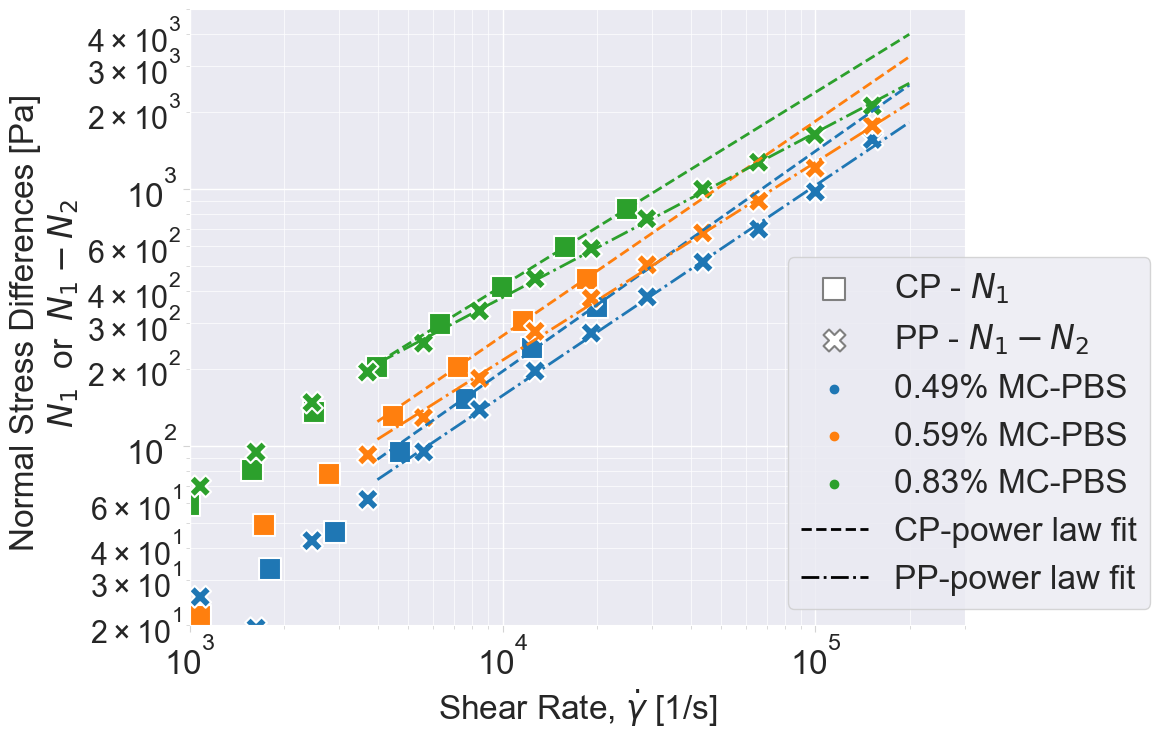

In [11]:
x_axis='Shear Rate'
y_axis='N1'
#plot_order = ['CC - rotation', 'CC - oscillation', 'CP', 'PP']

fontsize = 24
concentrations = concatenated_N1['Buffer'].unique()
colors = sns.color_palette('tab10', len(concentrations))

kws = {"s": 250, "linewidth": 1.5}  #, 'alpha': 0.5
kws_2 = {"s": 250, "linewidth": 1.5,
         "edgecolor": 'gray', "facecolor": "w"}

df_fit_params_n1_cp = pd.DataFrame()
df_fit_params_n1_pp =pd.DataFrame()

with sns.axes_style('darkgrid'):
    fig = plt.figure(0, (10,8))
    ax = plt.subplot(111)

    sns.scatterplot(x=x_axis, y=y_axis, data=df_means_N1,
                    hue='Buffer',
                    palette='tab10',
                    #hue_order = plot_order,
                    style='Device',
                    #style_order = plot_order,
                    markers=['s', 'X'],
                    ax=ax,
                    **kws
                    )
    # Fitting the N1 data to Power Law

    for color, cc in zip(colors, concentrations):
        data_cp = df_cp_means_filt[df_cp_means_filt['Buffer'] == cc]
        data_pp = df_wierschem[df_wierschem['Buffer'] == cc]

        shear_rate_cp_filt = data_cp['Shear Rate'] >= 5000 # power law regime
        shear_rate_pp_filt = data_pp['Shear Rate'] >= 5000 # power law regime

        powerlaw_regime_cp = data_cp[shear_rate_cp_filt]
        powerlaw_regime_pp = data_pp[shear_rate_pp_filt]

        xdata_cp = np.array(powerlaw_regime_cp['Shear Rate'], dtype=float)
    #   ydata = np.array(powerlaw_regime['Viscosity'], dtype=float)  # viscosity fitting (if needed)
        ydata_cp = np.array(powerlaw_regime_cp['N1'], dtype=float)

        xdata_pp = np.array(powerlaw_regime_pp['Shear Rate'], dtype=float)
        ydata_pp = np.array(powerlaw_regime_pp['N1'], dtype=float)

        log_xdata_cp = np.log(xdata_cp)
        log_ydata_cp = np.log(ydata_cp)

        log_xdata_pp = np.log(xdata_pp)
        log_ydata_pp = np.log(ydata_pp)

        fit_n1_cp, cov_n1_cp = np.polyfit(log_xdata_cp, log_ydata_cp, 1, cov=True)
        fit_n1_pp, cov_n1_pp = np.polyfit(log_xdata_pp, log_ydata_pp, 1, cov=True)

        n_n1_cp = fit_n1_cp[0]
        K_n1_cp = np.exp(fit_n1_cp[1])
        n_n1_cp_err = np.sqrt(np.diag(cov_n1_cp)[0])
        K_n1_cp_err = np.sqrt(np.diag(cov_n1_cp)[1])

        n_n1_pp = fit_n1_pp[0]
        K_n1_pp = np.exp(fit_n1_pp[1])
        n_n1_pp_err = np.sqrt(np.diag(cov_n1_pp)[0])
        K_n1_pp_err = np.sqrt(np.diag(cov_n1_pp)[1])

        xdata_fit = np.logspace(3.6,5.3)
        ydata_cp_fit =  K_n1_cp * xdata_fit**n_n1_cp
        ydata_pp_fit =  K_n1_pp * xdata_fit**n_n1_pp

        ax.plot(xdata_fit, ydata_cp_fit, ls='--', color=color,
                lw=2,
                label='CP-power law fit')
        ax.plot(xdata_fit, ydata_pp_fit, ls='-.', color=color,
                lw=2,
                label='PP-power law fit')

        fit_params_n1_cp = {'n_n1_cp': [n_n1_cp],
                            'K_n1_cp': [K_n1_cp],
                            'Buffer' : [cc],
                            'n_n1_pp_err' : [n_n1_cp_err],
                            'K_n1_cp_err' : [K_n1_cp_err * K_n1_cp]
                            }
        df_fit_params_n1_cp = pd.concat([df_fit_params_n1_cp, pd.DataFrame(fit_params_n1_cp)])  #df_fit_params_n1_cp.append(fit_params_n1_cp, ignore_index=True)

        fit_params_n1_pp = {'n_n1_pp': [n_n1_pp],
                            'K_n1_pp': [K_n1_pp],
                            'Buffer' : [cc],
                            'n_n1_pp_err' : [n_n1_pp_err],
                            'K_n1_cp_err' : [K_n1_pp_err * K_n1_pp]
                            }

        df_fit_params_n1_pp = pd.concat([df_fit_params_n1_pp, pd.DataFrame(fit_params_n1_pp)])


    ax.set(xscale='log', yscale='log')
    ax.set_xlim(1000, 3e5)
    ax.set_ylim(20, 5000)

    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=[3,0])
    ax.yaxis.set_minor_formatter(y_minor_formatter)

    plt.xlabel("Shear Rate, $\dot\gamma$ [1/s]", fontsize=fontsize)
    plt.ylabel("Normal Stress Differences [Pa] \n $N_1 $  or  $N_1 - N_2$", fontsize=fontsize)

    square_handle = plt.scatter([], [], marker='s', **kws_2, label='square')
    x_handle = plt.scatter([], [], marker='X', **kws_2, label='X')
    b_1_handle = plt.scatter([], [], marker=None, color='tab:blue')
    b_2_handle = plt.scatter([], [], marker=None, color='tab:orange')
    b_3_handle = plt.scatter([], [], marker=None, color='tab:green')

    lines = ax.lines

    handles = [ square_handle, x_handle, b_1_handle, b_2_handle, b_3_handle] + lines[:2]
    labels = ['CP - $N_1$', 'PP - $N_1 - N_2$','0.49% MC-PBS', '0.59% MC-PBS', '0.83% MC-PBS','CP-power law fit', 'PP-power law fit',]

    # change color of the line handles to black
    # one legend marker for all three fit lines
    ax.legend(handles, labels, loc='lower left', fontsize=24, bbox_to_anchor=[.75,0])
    leg = ax.get_legend()
    leg.legendHandles[-1].set_color('k')
    leg.legendHandles[-2].set_color('k')

    #savename = r"..\plots\figure_2\Figure_2B"
    #fig.savefig(savename+".png", dpi=900, bbox_inches="tight")
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches="tight")

    plt.show()

In [12]:
df_fit_params_n1_cp

n_n1_cp   K_n1_cp        Buffer  n_n1_pp_err  K_n1_cp_err
0  0.857093  0.072739  0.49% MC-PBS     0.050290     0.034499
0  0.835419  0.122171  0.59% MC-PBS     0.022978     0.026292
0  0.752811  0.409601  0.83% MC-PBS     0.009438     0.036535

In [13]:
df_fit_params_n1_pp

n_n1_pp   K_n1_pp        Buffer  n_n1_pp_err  K_n1_cp_err
0  0.818016  0.083890  0.49% MC-PBS     0.013649     0.011830
0  0.770090  0.179134  0.59% MC-PBS     0.016030     0.029663
0  0.641488  1.027350  0.83% MC-PBS     0.007956     0.084427